In [1]:
# Task 1: Analysis Workflow and Understanding of Brent Oil Prices

## Business Objective
# The main goal of this analysis is to study how important events affect Brent oil prices, focusing on the linkage between oil price changes and significant events such as political decisions, conflicts, global economic sanctions, and OPEC policies.

## Situational Overview
# As a data scientist at Birhan Energies, this analysis aims to provide actionable insights that guide investment strategies, policy development, and operational planning.

## Data Overview
# - **Dataset**: Historical Brent oil prices from May 20, 1987, to September 30, 2022.
# - **Data Fields**:
#   - `Date`: The date of the recorded Brent oil price.
#   - `Price`: The price of Brent oil in USD per barrel.

## Step 1: Import Libraries

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


In [3]:
# Load the dataset
url = '/content/Copy of BrentOilPrices.csv'  # Ensure the dataset is uploaded
data = pd.read_csv(url, parse_dates=['Date'], dayfirst=True)
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

# Display the first few rows of the dataset
data.head()


<ipython-input-3-8acf959b1636>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(url, parse_dates=['Date'], dayfirst=True)


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [10]:
# Section 3: Check for Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Data Cleaning: Drop missing values if any
data.dropna(inplace=True)

Missing Values:
 Price    0
dtype: int64


In [4]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1EKdR5gdJ7BGHJmsR8yI3G93E7AqxJdkeehxwFp8MBqw#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


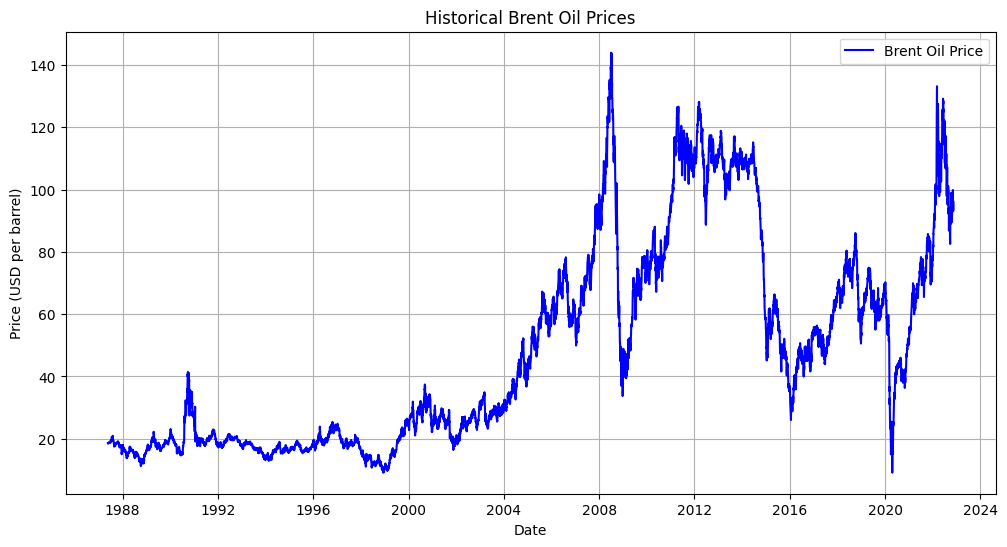

In [5]:
# Explore the dataset
data.describe()

# Plot the historical Brent oil prices
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Brent Oil Price', color='blue')
plt.title('Historical Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid()
plt.show()


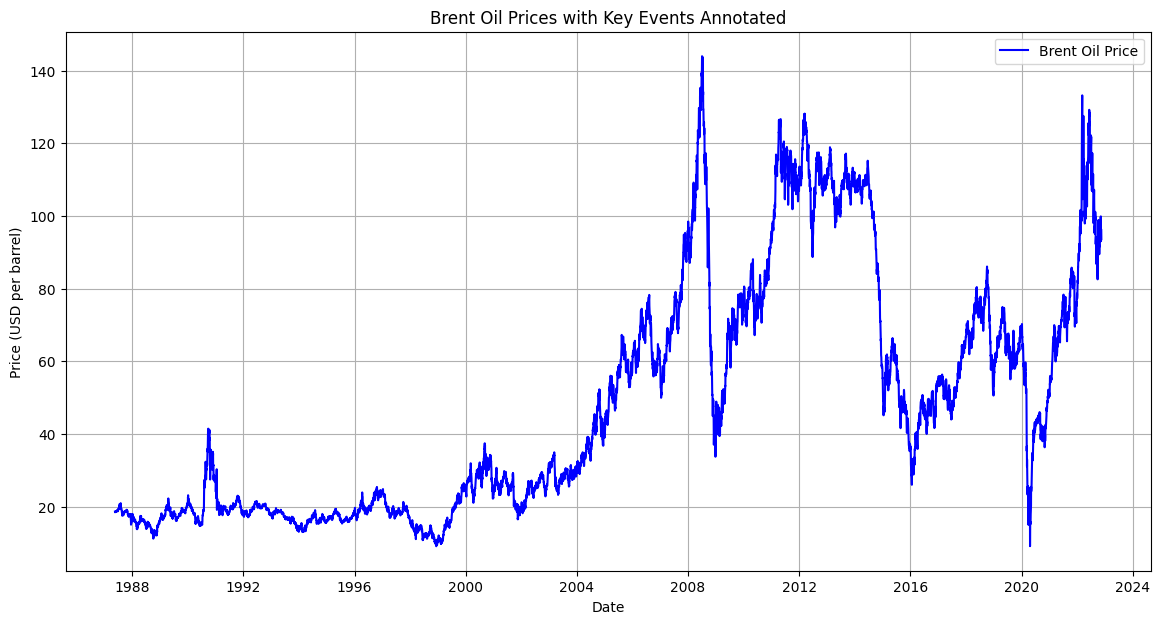

In [12]:
# Section 5: Annotating Key Events
events = {
    'Arab Spring': '2011-01-01',  # Example date
    'Oil Price Crash': '2014-11-01',  # Example date
}

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Brent Oil Price', color='blue')

# Annotating events with error handling
for event, date in events.items():
    event_date = pd.to_datetime(date)
    if event_date in data.index:
        plt.annotate(event,
                     xy=(event_date, data['Price'].loc[event_date]),
                     xytext=(10, 30),
                     textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', lw=1.5))
    else:
        print(f"Warning: {event} on {date} not found in the dataset.")

plt.title('Brent Oil Prices with Key Events Annotated')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.grid()
plt.legend()
plt.show()

In [15]:
# Section 6: Statistical Analysis - ADF Test for Stationarity
result = adfuller(data['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation of the results
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
The series is non-stationary.


In [16]:
# Section 7: Model Selection and Implementation
# Fit ARIMA model (adjust parameters as necessary)
model = sm.tsa.ARIMA(data['Price'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Fri, 01 Nov 2024   AIC                          29093.899
Time:                        13:12:13   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


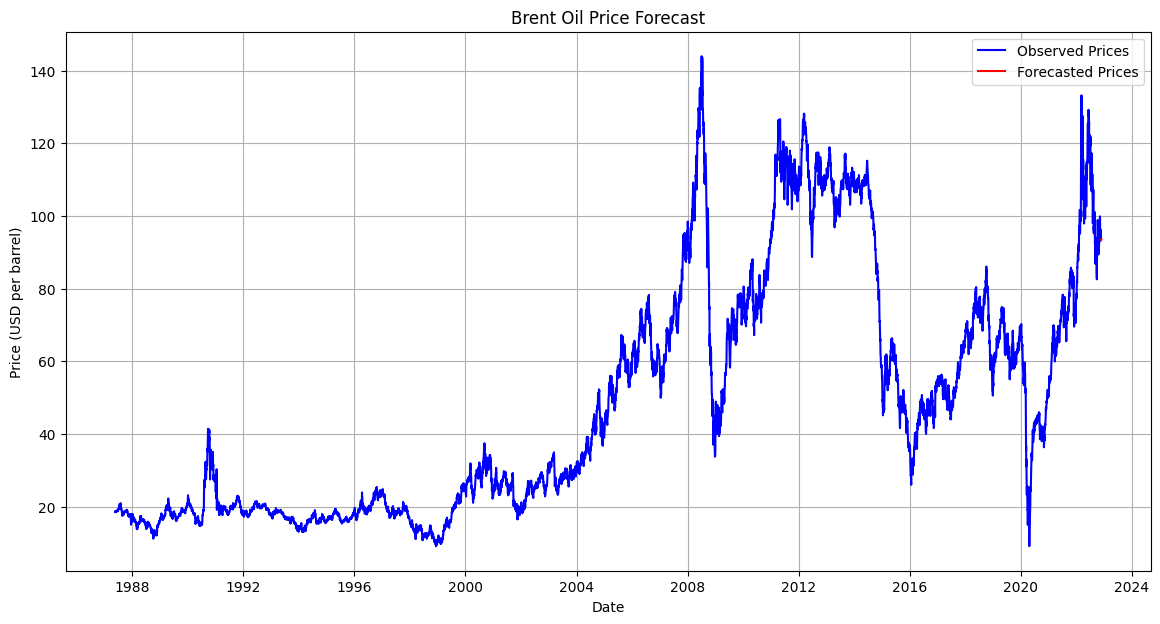

In [17]:
# Section 8: Forecasting
forecast = model_fit.forecast(steps=10)

# Section 9: Plotting the Forecast
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Observed Prices', color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=11, freq='D')[1:], forecast, label='Forecasted Prices', color='red')
plt.title('Brent Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Section 10: Assumptions and Limitations
# Assumptions:
# - Historical price patterns will persist in the future.
# - The model assumes a linear relationship between input variables and prices.

# Limitations:
# - External factors may not be fully captured.
# - Predictions are subject to uncertainty, especially in volatile markets.